In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.



In [3]:
cancer= pd.read_csv('/Users/lescl/OneDrive/Área de Trabalho/Estudo-Davi/data.csv')

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer.shape


(569, 33)

In [6]:
## como não vamos usar o id e a unnamed, e a diagnosis, vamos tratar os dado
X_df=cancer
X_df['diagnosis']=cancer.diagnosis
y=X_df['diagnosis']
X_df=cancer.drop(['id','Unnamed: 32','diagnosis'],axis=1)


In [7]:
X_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


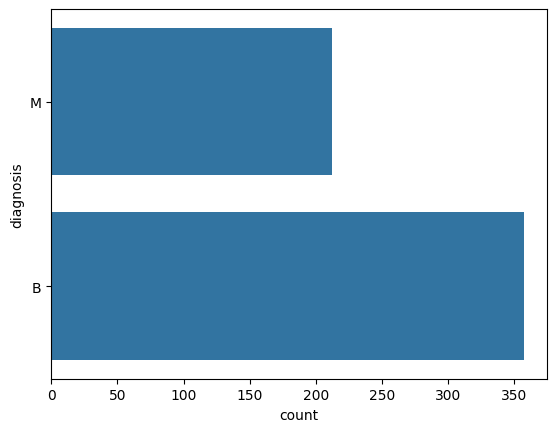

In [8]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()

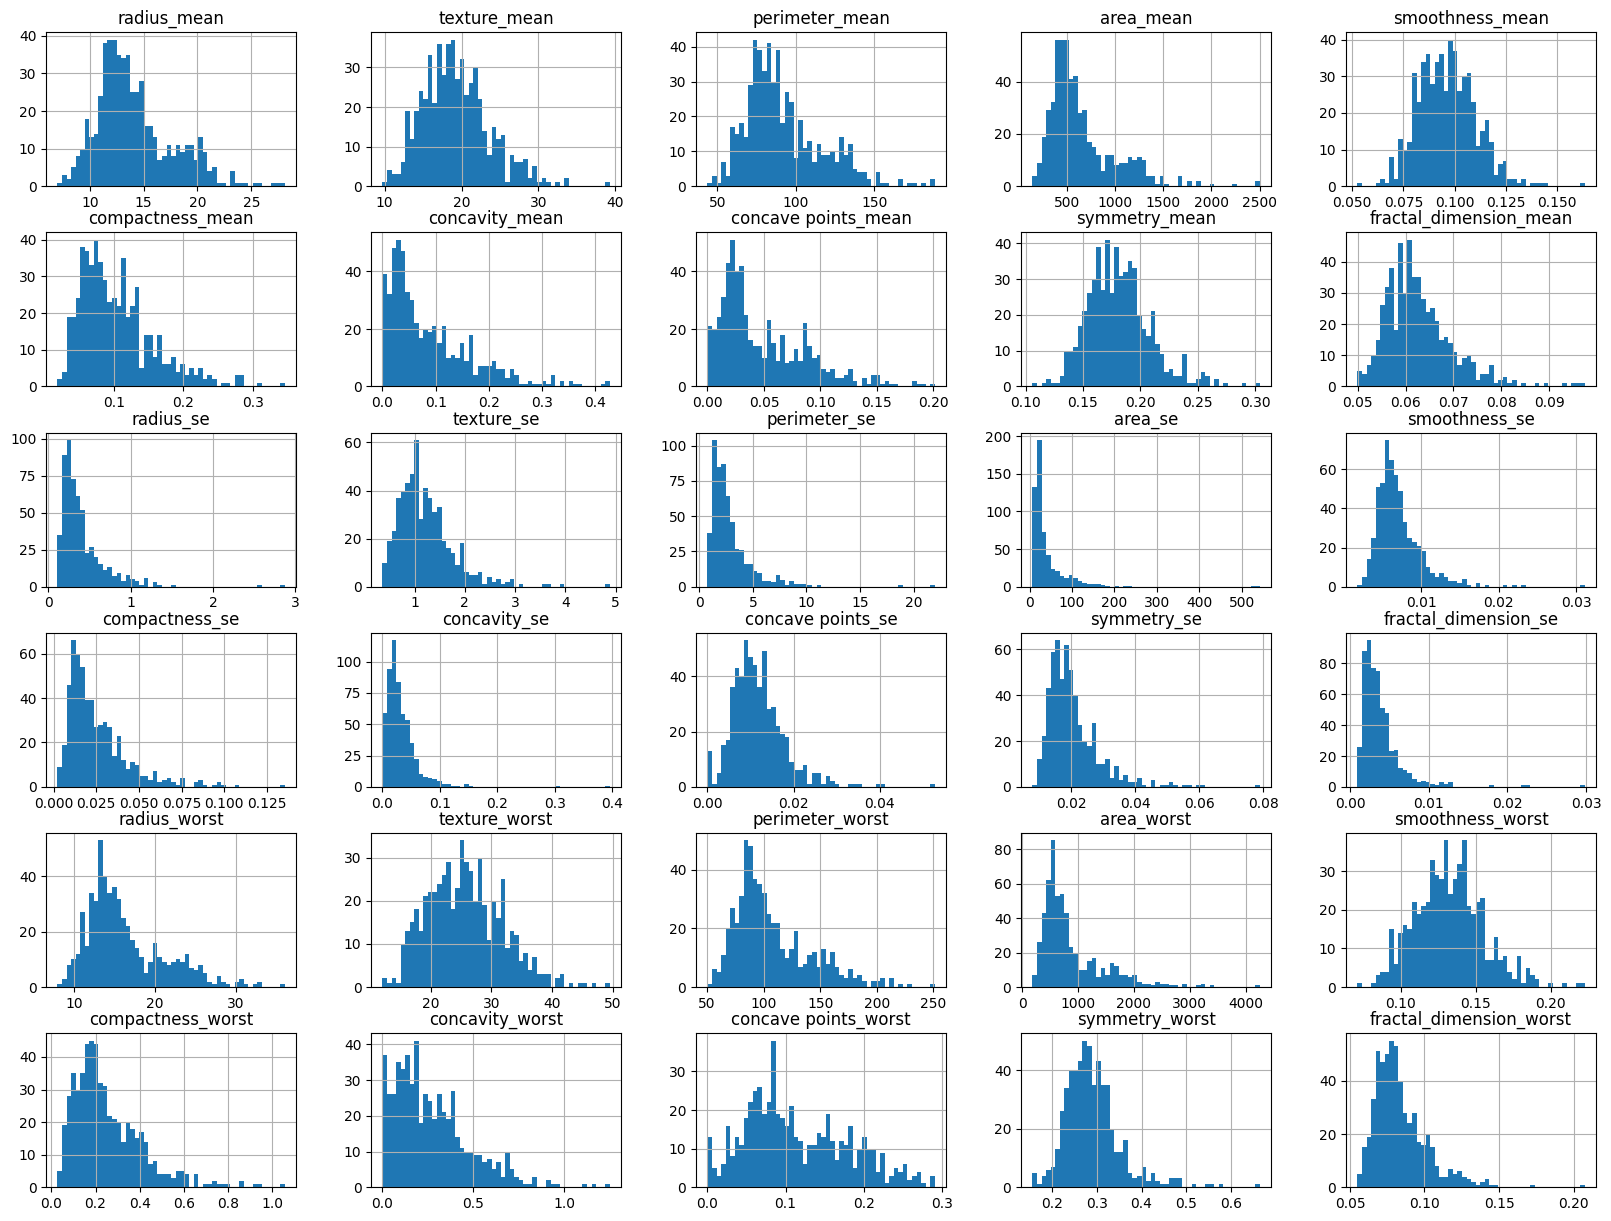

In [9]:
## Visualization
X_df.hist(bins=50, figsize=(20,15))

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

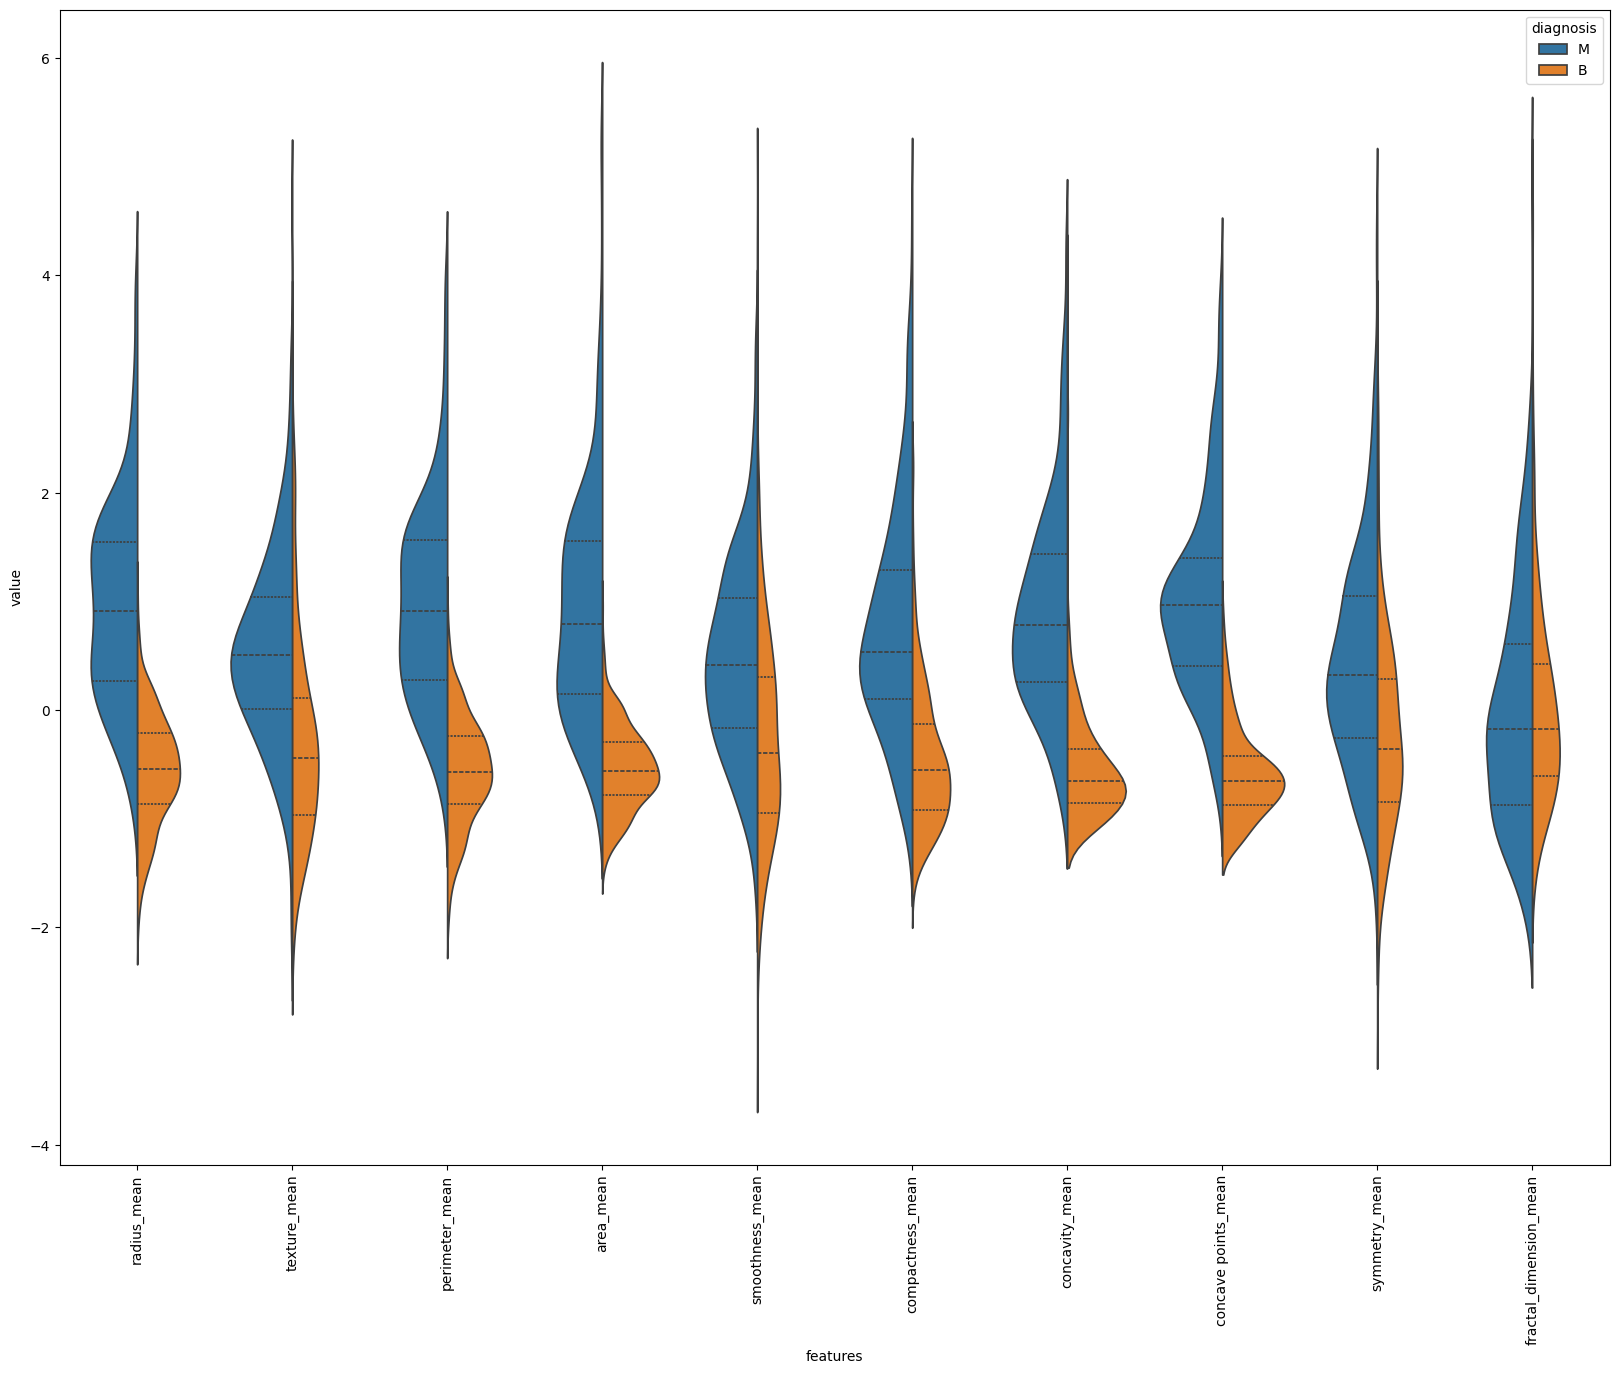

In [10]:
##violin plot para ver a curva normal de cada dado e se cada feature parece ser util
data_dia = y
data = X_df
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

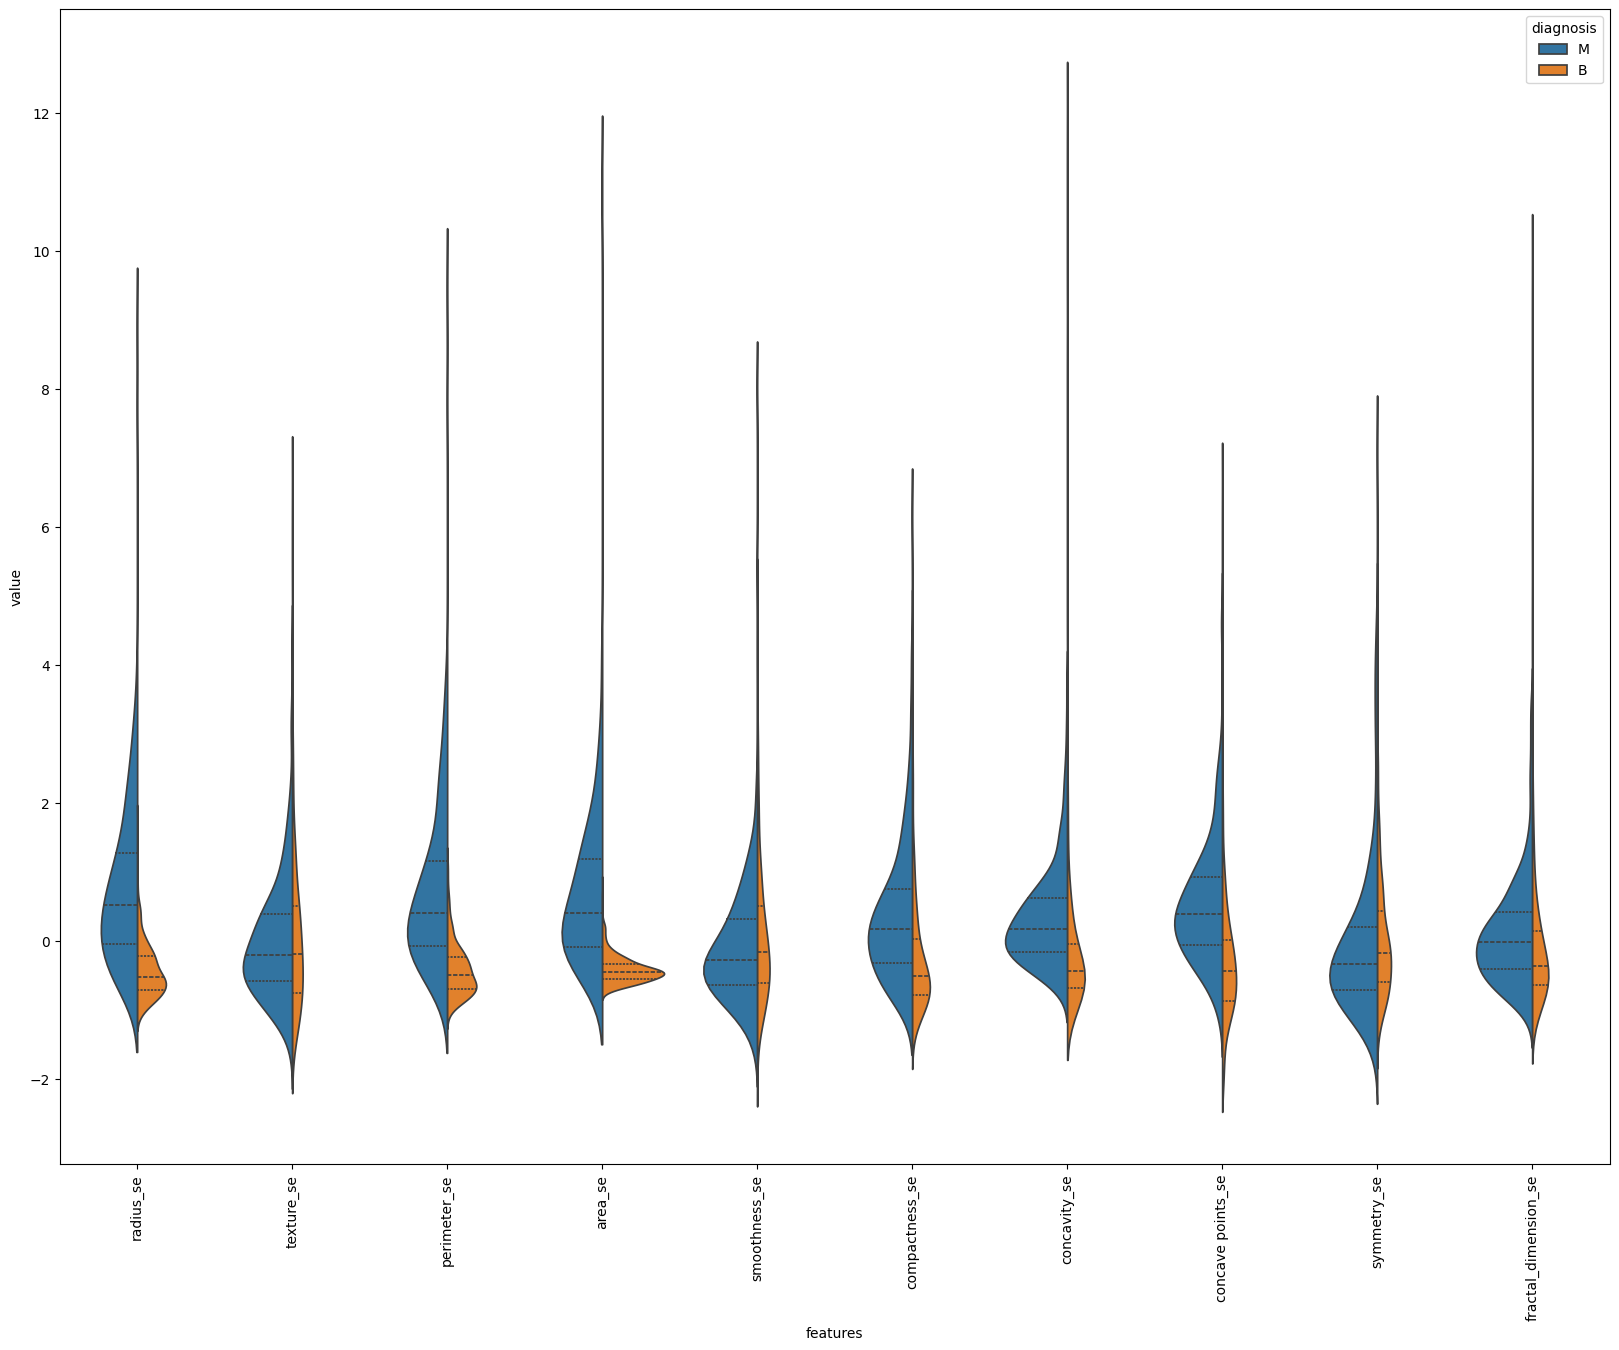

In [11]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

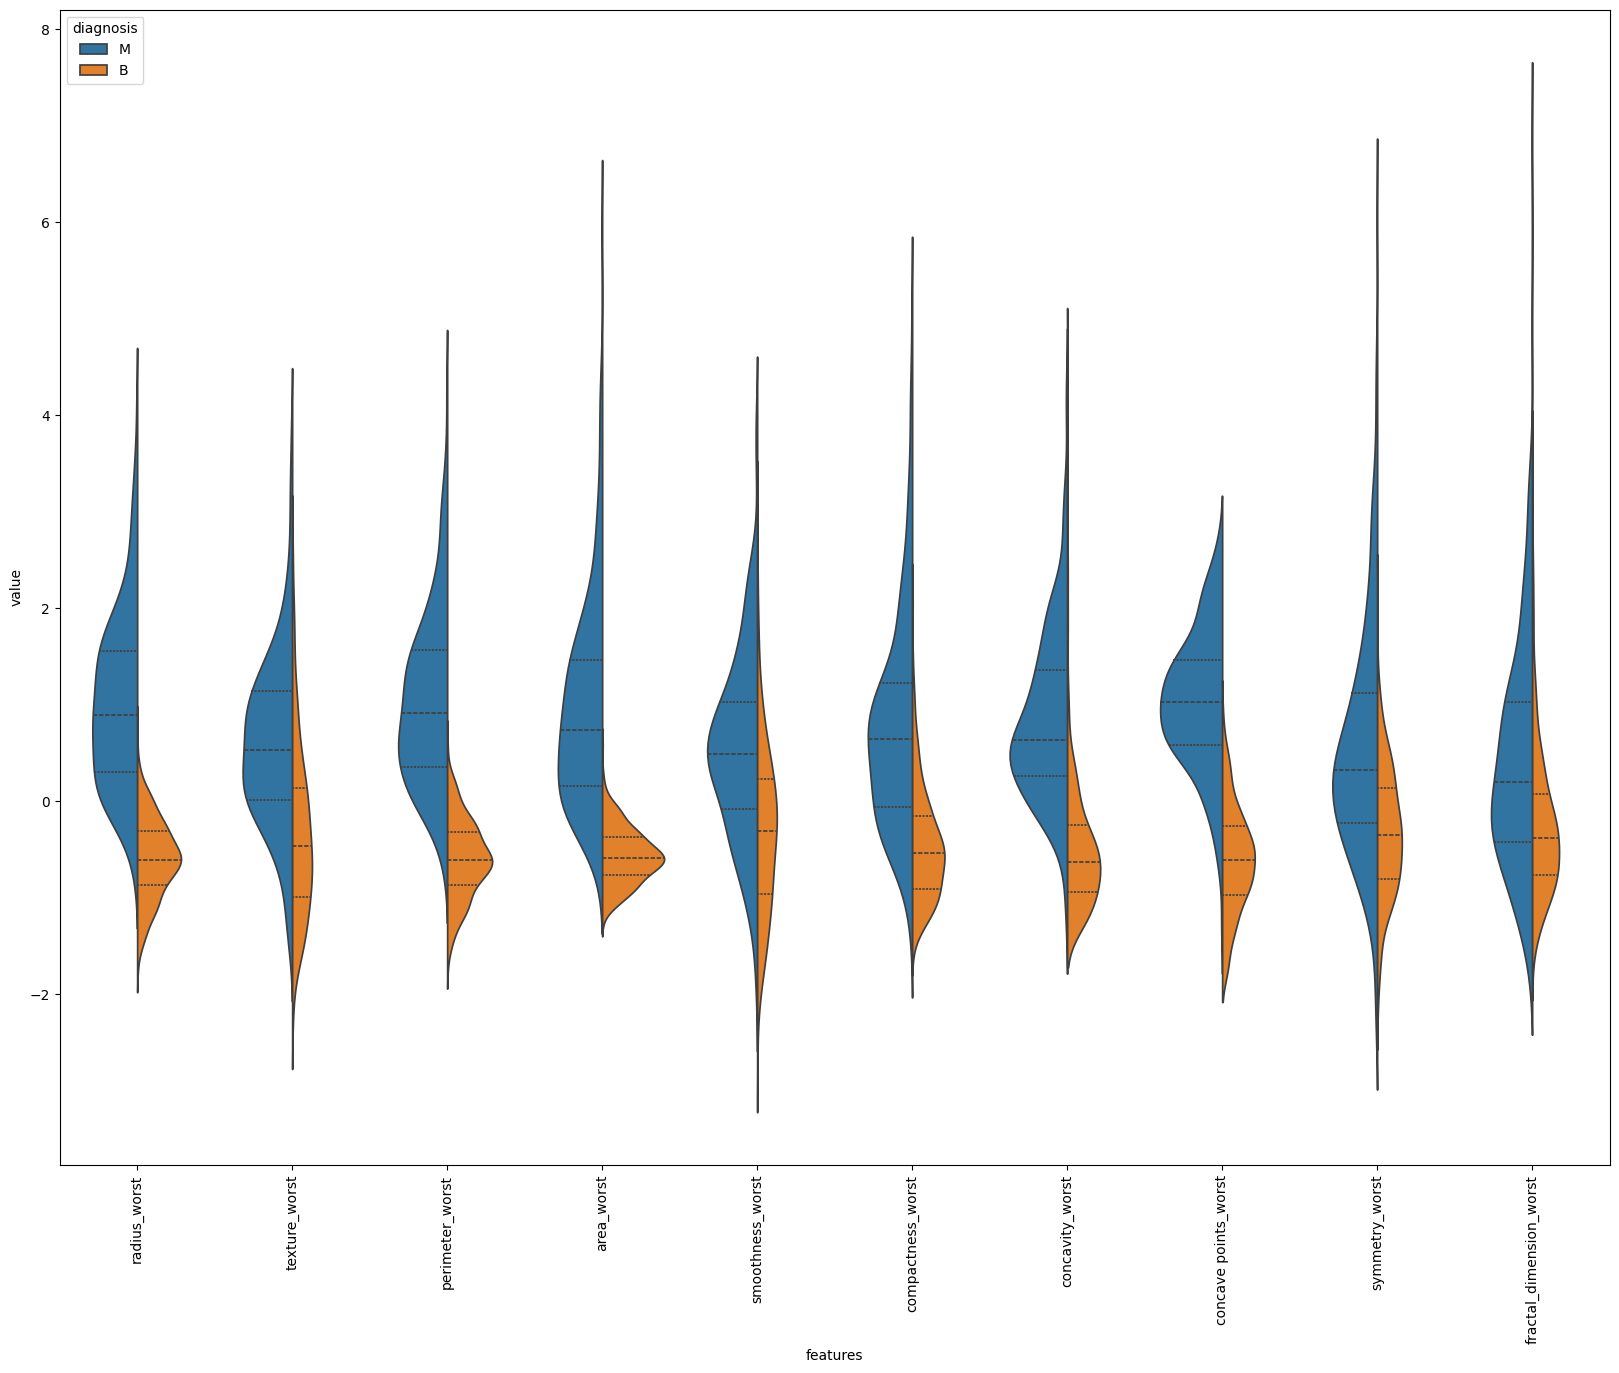

In [12]:


data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

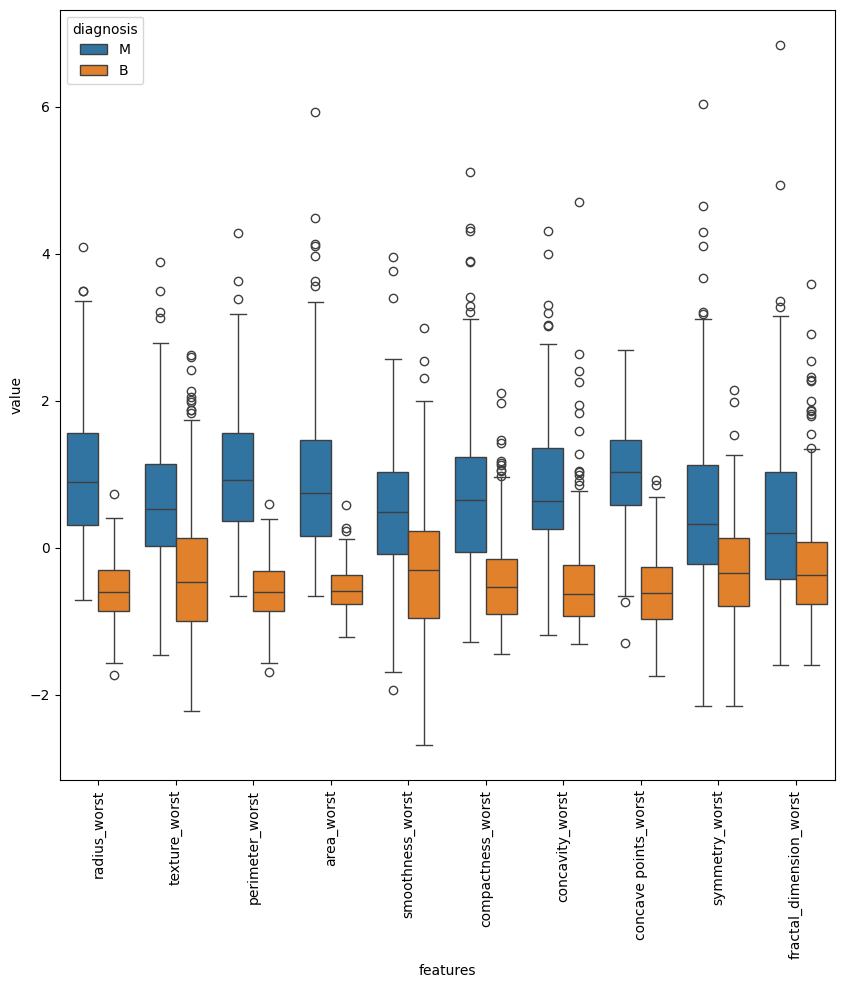

In [13]:
## visualização em bloco para ver possiveis outliers
## a linha no meio do quadrado represena a mediana
## o quadrado representa onde estão 50% dos dados, valores pra fora das hastes são considerados outliers



plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

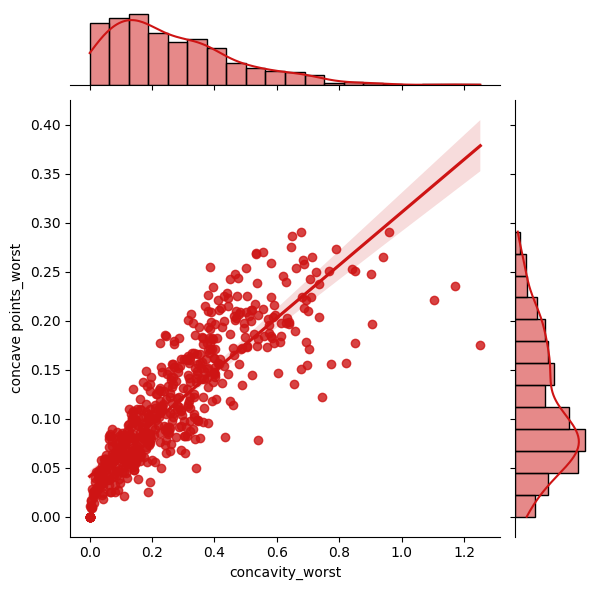

In [14]:
## avaliando a correlação entre duas features

sns.jointplot(x='concavity_worst', y='concave points_worst', data=X_df, kind="reg", color="#ce1414")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

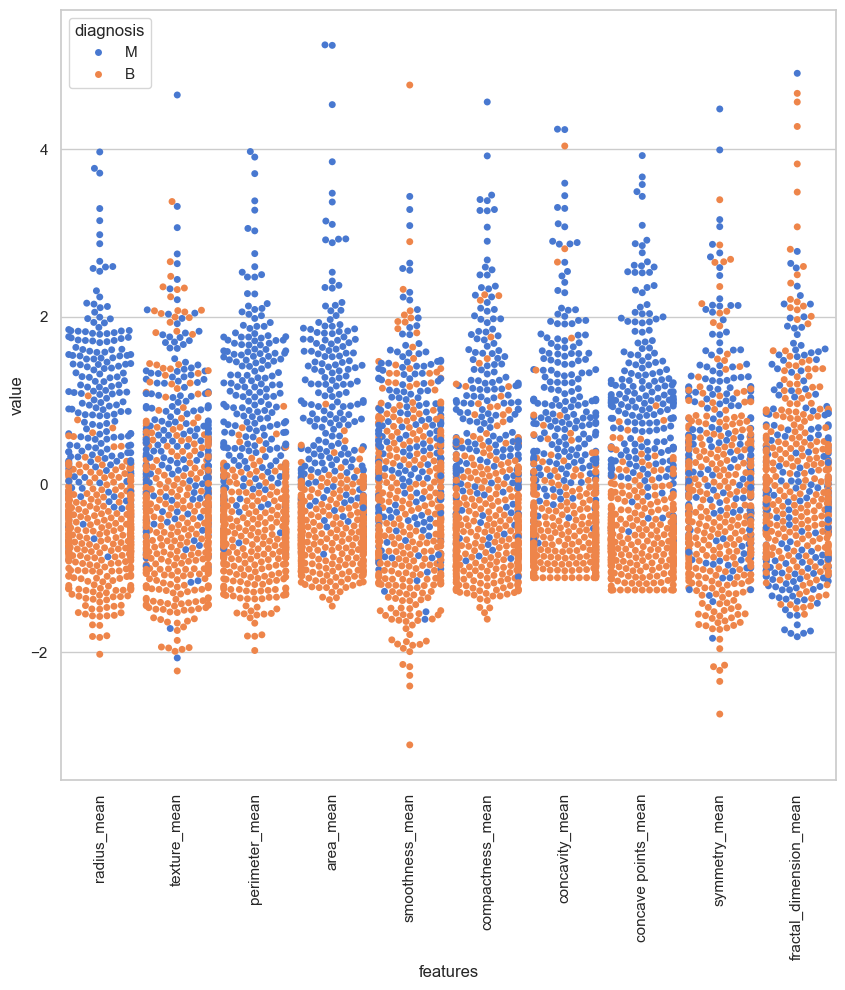

In [15]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

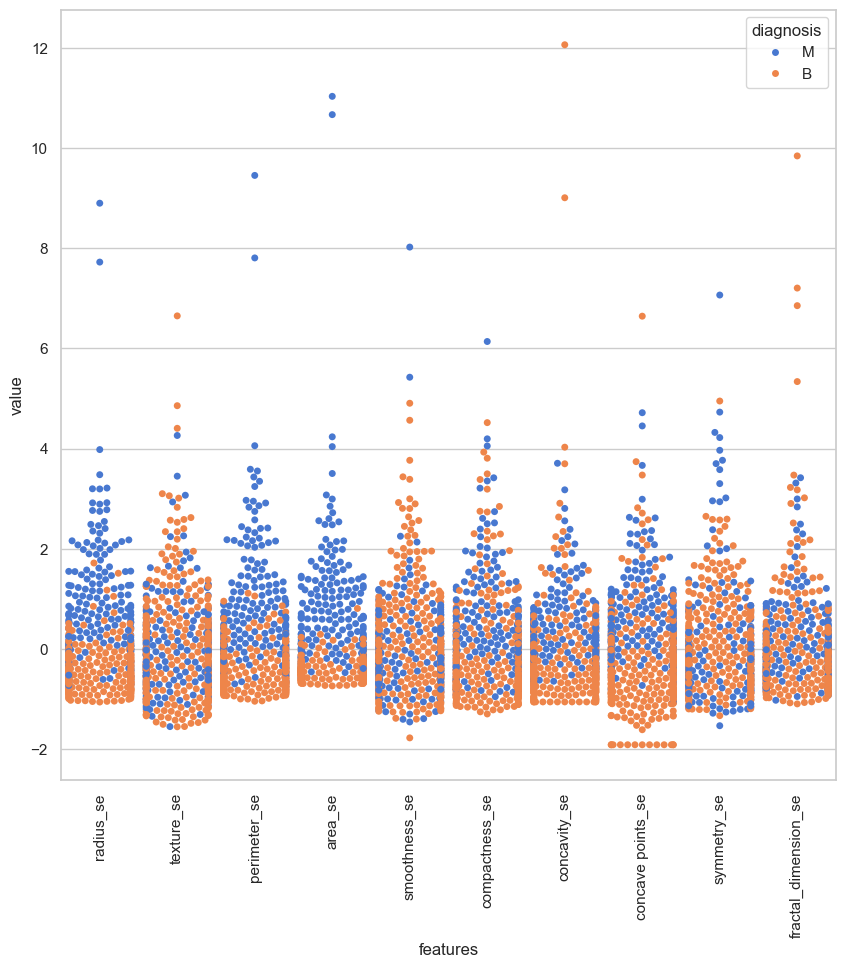

In [16]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

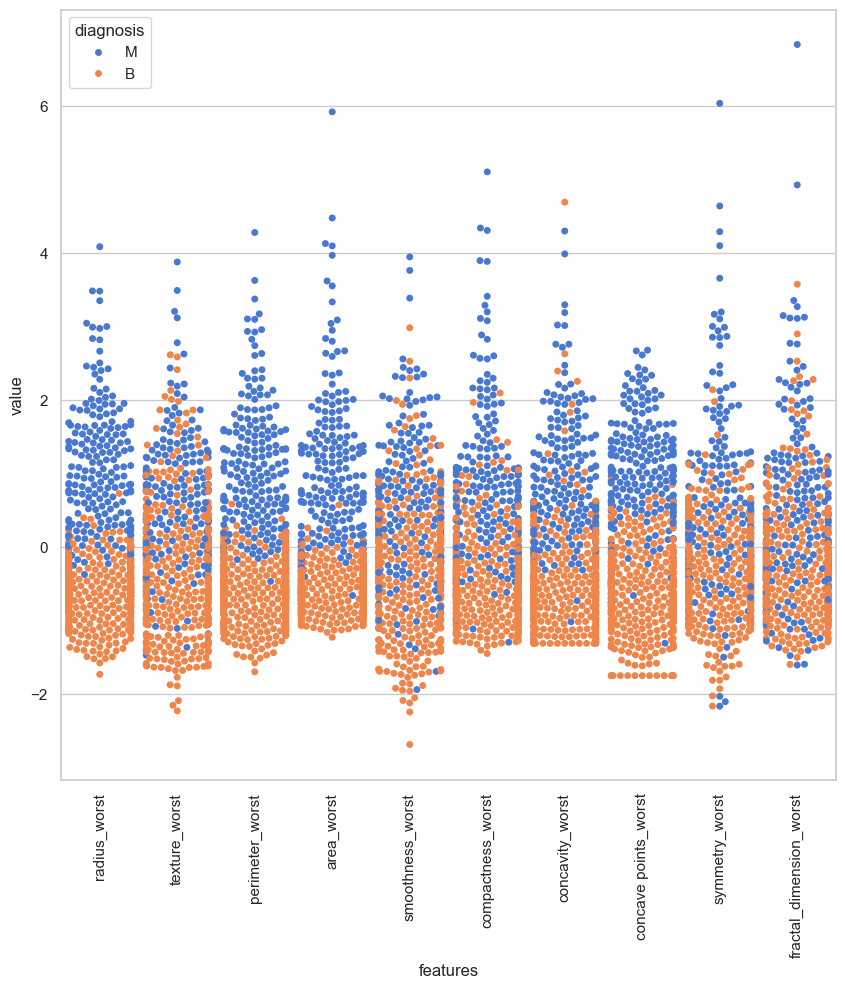

In [17]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

['radius_mean', 'perimeter_mean']
['radius_mean', 'area_mean']
['radius_mean', 'radius_worst']
['radius_mean', 'perimeter_worst']
['perimeter_mean', 'radius_mean']
['perimeter_mean', 'area_mean']
['perimeter_mean', 'radius_worst']
['perimeter_mean', 'perimeter_worst']
['area_mean', 'radius_mean']
['area_mean', 'perimeter_mean']
['area_mean', 'radius_worst']
['area_mean', 'perimeter_worst']
['area_mean', 'area_worst']
['radius_se', 'perimeter_se']
['radius_se', 'area_se']
['perimeter_se', 'radius_se']
['area_se', 'radius_se']
['radius_worst', 'radius_mean']
['radius_worst', 'perimeter_mean']
['radius_worst', 'area_mean']
['radius_worst', 'perimeter_worst']
['radius_worst', 'area_worst']
['perimeter_worst', 'radius_mean']
['perimeter_worst', 'perimeter_mean']
['perimeter_worst', 'area_mean']
['perimeter_worst', 'radius_worst']
['perimeter_worst', 'area_worst']
['area_worst', 'area_mean']
['area_worst', 'radius_worst']
['area_worst', 'perimeter_worst']


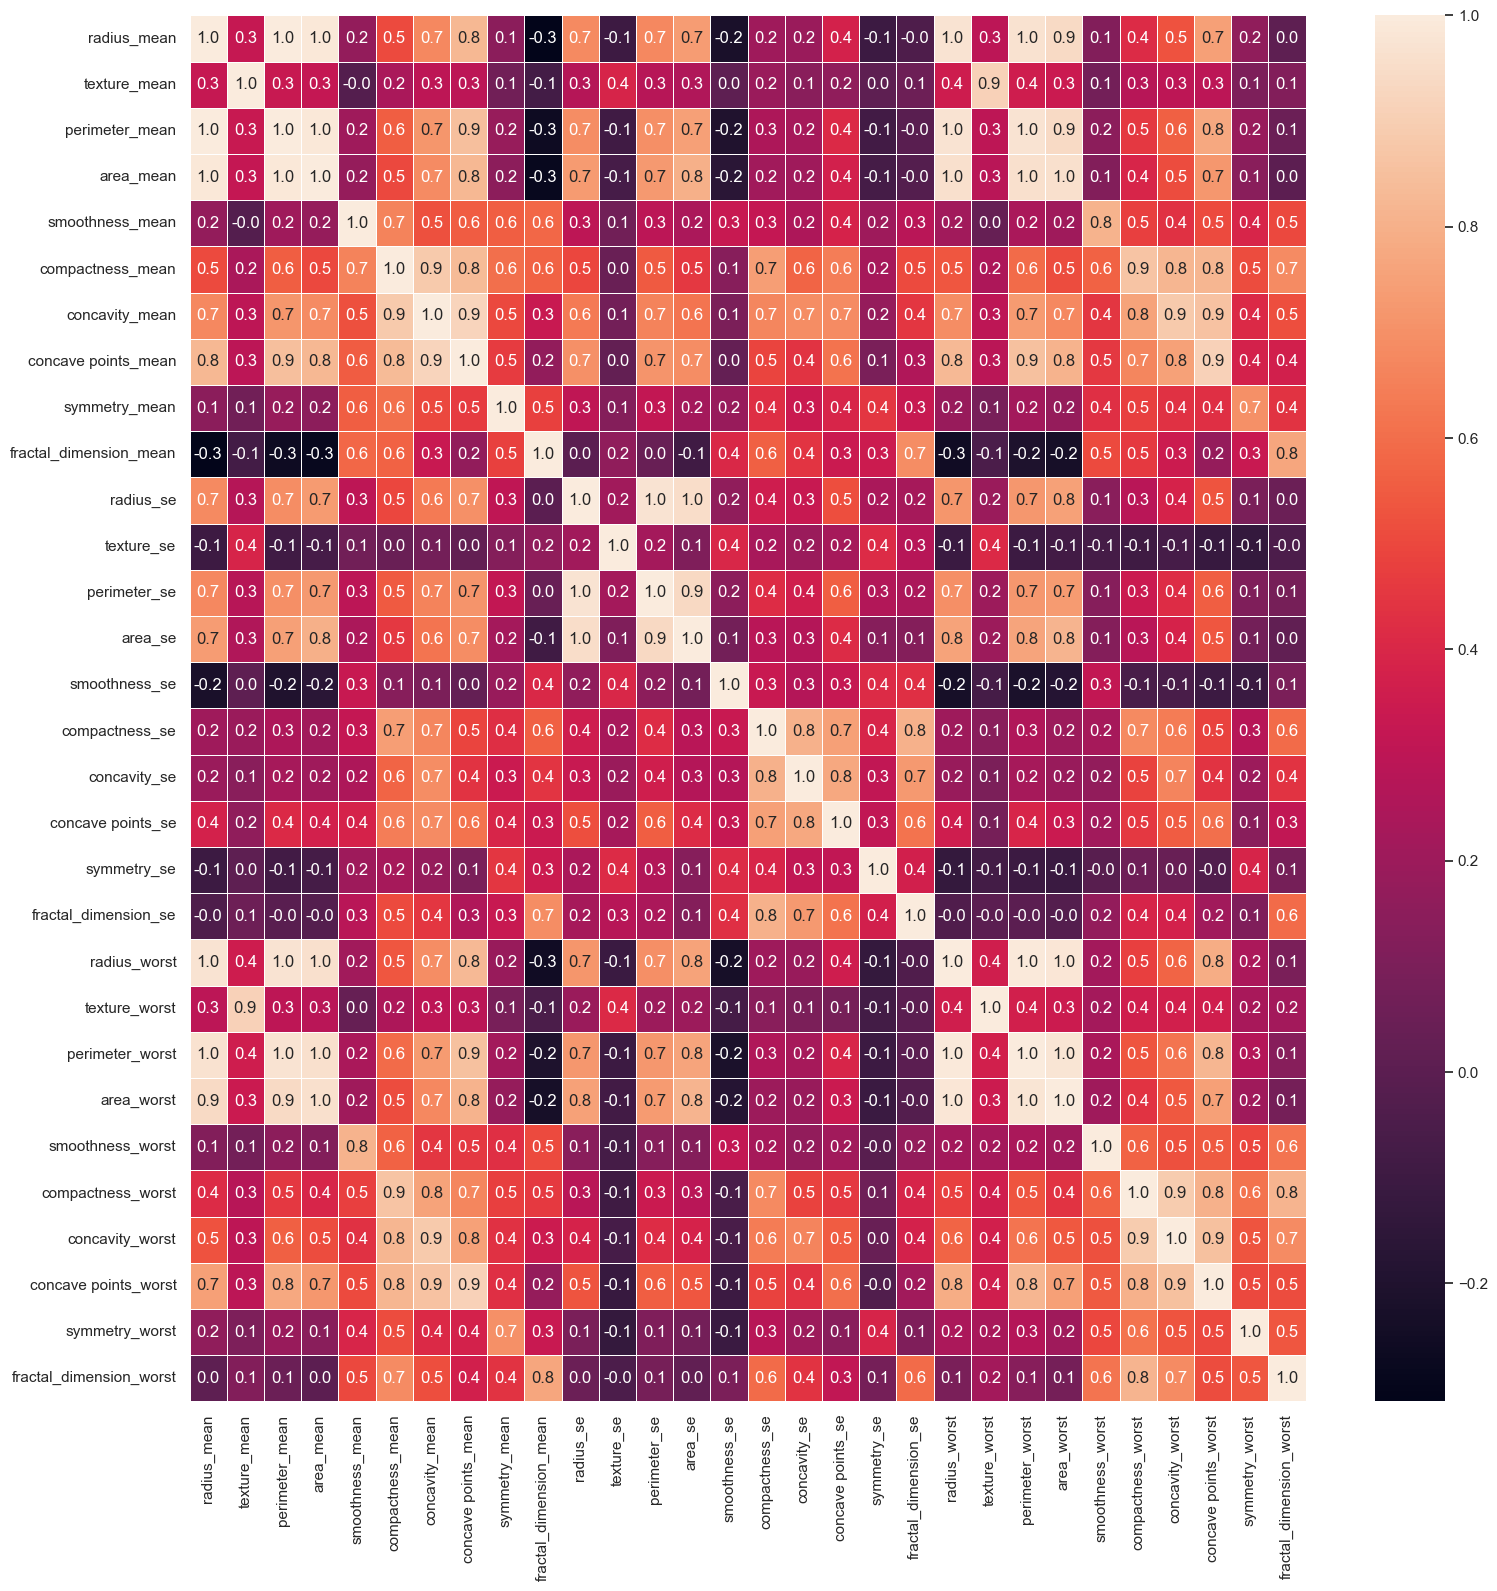

In [18]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
list_correlate=[]

for i in range(X_df.corr().shape[0]):
    for j in range(X_df.corr().shape[1]):
        if X_df.corr().iat[i,j]>0.95 and X_df.corr().index[i]!=X_df.corr().index[j]:
            list_correlate.append([X_df.corr().index[i],X_df.corr().index[j]]) 
            
for par in list_correlate:
    print(par)
            
        


Treino sem seleção de features

In [19]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


def TrainValidate(X,y):
    
    normalizador=MinMaxScaler()
    X_normalizado=normalizador.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    svc = SVC(kernel='rbf', C=1.0)
    mlp= MLPClassifier()
    reg= LogisticRegression(multi_class='ovr')
    rdmfor= RandomForestClassifier(random_state=41)
    gradbo= GradientBoostingClassifier()
    
    cv_scores_knn = cross_val_score(knn, x_train, y_train, cv=5)
    cv_scores_svc = cross_val_score(svc, x_train, y_train, cv=5)
    cv_scores_mlp = cross_val_score(mlp, x_train, y_train, cv=5)
    cv_scores_reg = cross_val_score(reg, x_train, y_train, cv=5)
    cv_scores_rdmfor = cross_val_score(rdmfor, x_train, y_train, cv=5)
    cv_scores_gradbo = cross_val_score(gradbo, x_train, y_train, cv=5)
    
    
    print("KNeighborsClassifier (validação cruzada):%.5f" % (np.mean(cv_scores_knn)))
    print("SVC(validação cruzada):%.5f" % (np.mean(cv_scores_svc)))
    print("MLP(validação cruzada):%.5f" % (np.mean(cv_scores_mlp)))
    print("Regressão Logistica(validação cruzada):%.5f" % (np.mean(cv_scores_reg)))
    print("Random Forest(validação cruzada):%.5f" % (np.mean(cv_scores_rdmfor)))
    print("Gradient Boost(validação cruzada):%.5f" % (np.mean(cv_scores_gradbo)))




In [ ]:
def TrainValidateGridSearch(X,y):
    normalizador=MinMaxScaler()
    X_normalizado=normalizador.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    knn = KNeighborsClassifier()
    svc = SVC()
    mlp= MLPClassifier()
    reg= LogisticRegression()
    rdmfor= RandomForestClassifier()
    gradbo= GradientBoostingClassifier()
    
    ##parametros 
    
    knn_params={'n_neighbors':[3,7,9,12,15]}
    
    svc_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly','sigmoid']}
    
    grid_mlpparams= [
    {'scaler': [StandardScaler()],
     'estimator': [MLPClassifier(random_state=42)],
     'estimator__solver': ['adam'],
     'estimator__learning_rate_init': [0.0001],
     'estimator__max_iter': [300],
     'estimator__hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400), (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
     'estimator__activation': ['logistic', 'tanh', 'relu'],
     'estimator__alpha': [0.0001, 0.001, 0.005],
     'estimator__early_stopping': [True, False]
     }
    ]
    pipeline_mlp = Pipeline([('scaler', None), ('estimator', MLPClassifier())])

    reg_params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

    rdmfor_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    gradbo_params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

    #chamando a função do grid
    grid_knn=GridSearchCV(knn,knn_params,cv=5)
    grid_svc=GridSearchCV(svc,svc_params,cv=5)
    grid_mlp=GridSearchCV(estimator=pipeline_mlp, param_grid=grid_mlpparams, 
                            scoring="accuracy",# average='macro'), 
                            n_jobs=-1, cv=5)
    grid_reg=GridSearchCV(reg,reg_params,cv=5)
    grid_rdmfor=GridSearchCV(rdmfor,rdmfor_params,cv=5)
    grid_gradbo=GridSearchCV(gradbo,gradbo_params,cv=5)

    #fazendo o fit pra cada grid
    grid_knn.fit(x_train,y_train)
    grid_svc.fit(x_train,y_train)
    grid_mlp.fit(x_train,y_train)
    grid_reg.fit(x_train,y_train)
    grid_rdmfor.fit(x_train,y_train)
    grid_gradbo.fit(x_train,y_train)

    #avaliação

    best_knn==grid_knn.best_estimator_
    best_svc=grid_svc.best_estimator_
    best_mlp=grid_mlp.best_estimator_
    best_reg=grid_reg.best_estimator_
    best_rdmfor=grid_rdmfor.best_estimator_
    best_gradbo=grid_gradbo.best_estimator_
    
    accuracy_best_knn=accuracy_score(y_test, best_knn.predict(x_test))
    accuracy_best_svc=accuracy_score(y_test, best_svc.predict(x_test))
    accuracy_best_mlp=accuracy_score(y_test,best_mlp.predict(x_test))
    accuracy_best_reg=accuracy_score(y_test,best_reg.predict(x_test))
    accuracy_best_rdmfor=accuracy_score(y_test,best_rdmfor.predict(x_test))
    accuracy_best_gradb=accuracy_score(y_test,best_gradbo.predict(x_test))

    print("A acuracia do melhor KNN", accuracy_best_knn)
    print("A acuracia do melhor SVC", accuracy_best_svc)
    print("A acuracia do melhor MLP", accuracy_best_mlp)
    print("A acuracia do melhor REGLOG", accuracy_best_reg)
    print("A acuracia do melhor RDMFOR", accuracy_best_rdmfor)
    print("A acuracia do melhor GRADBOOST", accuracy_best_gradbo)

TrainValidateGridSearch(X_1,y)
    

Treino com seleção de features:
In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict.

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# estratégia 1 de seleção de features: Correlação 
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']


X_1 = X_df.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
X_1.head()



,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

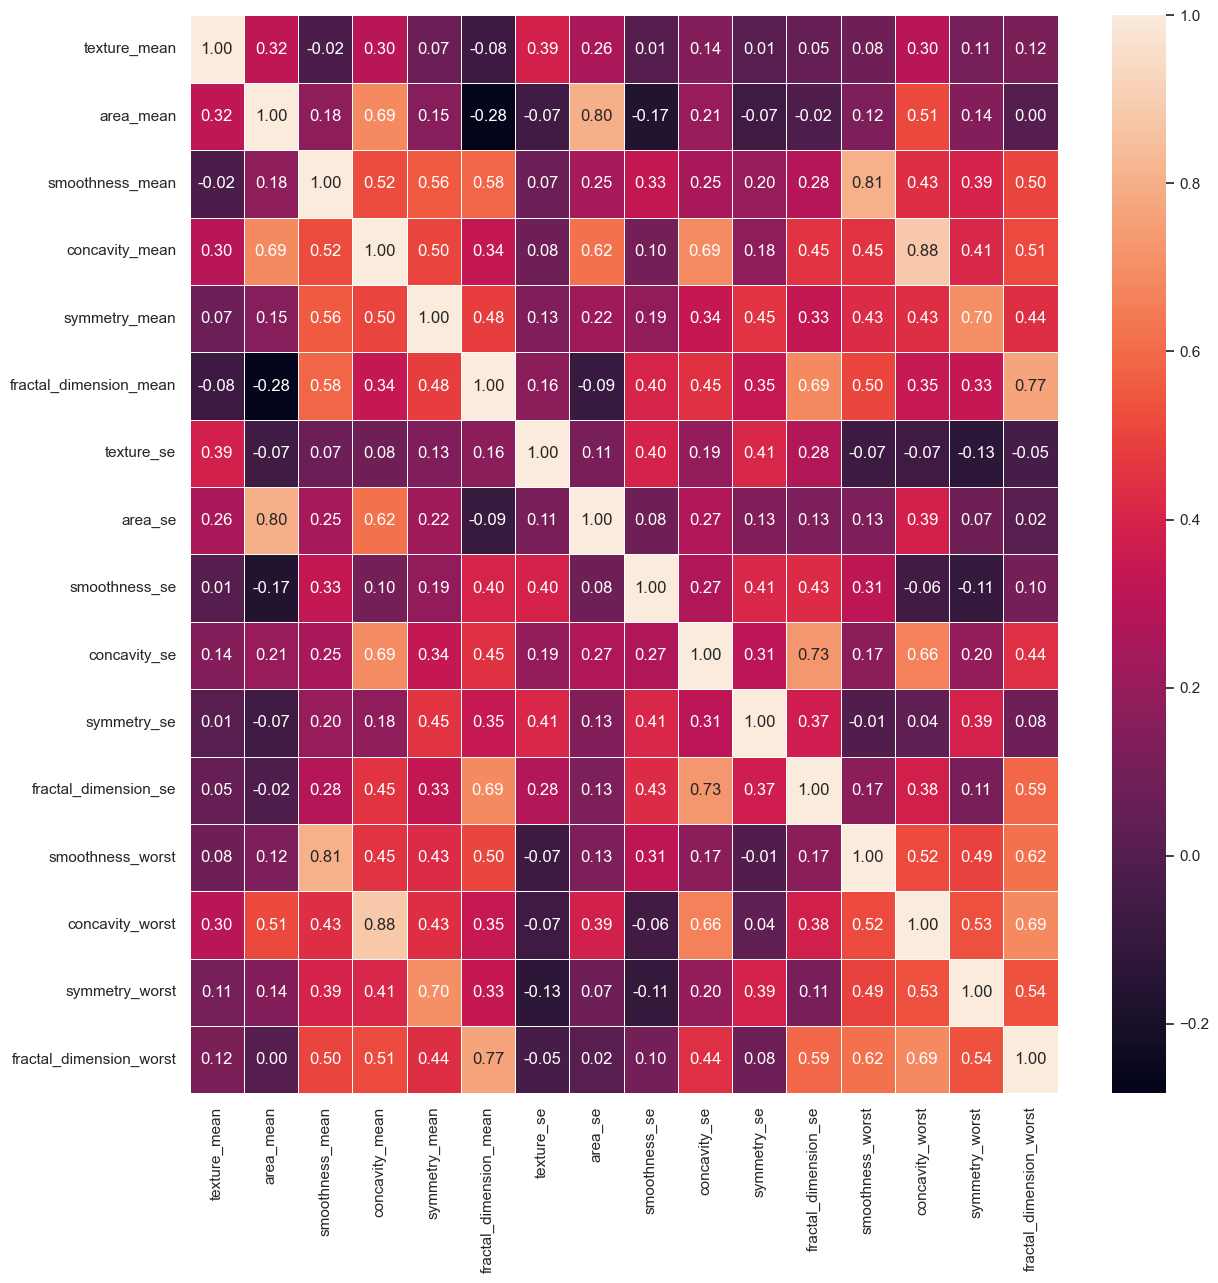

In [21]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(X_1.corr(),annot=True,linewidths=.5, fmt= '.2f',ax=ax)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)
x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

##Testando a extração de features
print("Sem seleção: \n")
TrainValidate(x_train,y_train)
print("Com seleção: \n")
TrainValidate(x1_train,y1_train)



Sem seleção: 



  File "C:\Users\lescl\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNeighborsClassifier (validação cruzada):0.93182
SVC(validação cruzada):0.90649
MLP(validação cruzada):0.92468
Regressão Logistica(validação cruzada):0.94617
Random Forest(validação cruzada):0.94630
Gradient Boost(validação cruzada):0.95701
Com seleção: 

KNeighborsClassifier (validação cruzada):0.88123
SVC(validação cruzada):0.88136
MLP(validação cruzada):0.83851
Regressão Logistica(validação cruzada):0.93909
Random Forest(validação cruzada):0.94987
Gradient Boost(validação cruzada):0.94247


In [23]:
## Univariate feature selection and random forest classification com base no k

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)

Accuracy is:  0.9649122807017544


In [24]:
## Recursive feature elimination (RFE) with random forest -> atribui pesos as features e elimina as menores
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['perimeter_mean', 'concavity_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [25]:
##testando com essas features

X_2=x_train[x_train.columns[rfe.support_]]
TrainValidate(X_2,y_train)


KNeighborsClassifier (validação cruzada):0.92091
SVC(validação cruzada):0.91370
MLP(validação cruzada):0.90325
Regressão Logistica(validação cruzada):0.94974
Random Forest(validação cruzada):0.95701
Gradient Boost(validação cruzada):0.96422


In [26]:
## Recursive feature elimination (RFE) with random forest -> atribui pesos as features e elimina as menores
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [27]:
##testando com essas features

X_3=x_train[x_train.columns[rfe.support_]]
TrainValidate(X_3,y_train)


KNeighborsClassifier (validação cruzada):0.92818
SVC(validação cruzada):0.90649
MLP(validação cruzada):0.90643
Regressão Logistica(validação cruzada):0.94981
Random Forest(validação cruzada):0.94987
Gradient Boost(validação cruzada):0.96058


In [28]:
##4) Recursive feature elimination with cross validation and random forest classification QUAIS FEATURES E QUANTAS
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=0) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])


Optimal number of features : 14
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [29]:
X_4=x_train[x_train.columns[rfecv.support_]]
TrainValidate(X_4,y_train)
print("\n Comparando sem extração de features: \n" )

TrainValidate(x_train,y_train)


KNeighborsClassifier (validação cruzada):0.93182
SVC(validação cruzada):0.90649
MLP(validação cruzada):0.92831
Regressão Logistica(validação cruzada):0.93903
Random Forest(validação cruzada):0.96786
Gradient Boost(validação cruzada):0.94981

 Comparando sem extração de features: 

KNeighborsClassifier (validação cruzada):0.93182
SVC(validação cruzada):0.90649
MLP(validação cruzada):0.85617
Regressão Logistica(validação cruzada):0.94617
Random Forest(validação cruzada):0.94630
Gradient Boost(validação cruzada):0.95701


Feature ranking:
1. feature 7 (0.135149)
2. feature 22 (0.124040)
3. feature 20 (0.098081)
4. feature 27 (0.097234)
5. feature 13 (0.066496)
6. feature 23 (0.064471)
7. feature 6 (0.056634)
8. feature 26 (0.048562)
9. feature 2 (0.043191)
10. feature 0 (0.040894)
11. feature 3 (0.032178)
12. feature 10 (0.025910)
13. feature 21 (0.020581)
14. feature 28 (0.019564)
15. feature 25 (0.018467)
16. feature 1 (0.015745)
17. feature 5 (0.015542)
18. feature 12 (0.013525)
19. feature 24 (0.009450)
20. feature 16 (0.009167)
21. feature 19 (0.006696)
22. feature 4 (0.006650)
23. feature 11 (0.004684)
24. feature 14 (0.004674)
25. feature 18 (0.004633)
26. feature 29 (0.004450)
27. feature 15 (0.004171)
28. feature 17 (0.003544)
29. feature 9 (0.003200)
30. feature 8 (0.002417)


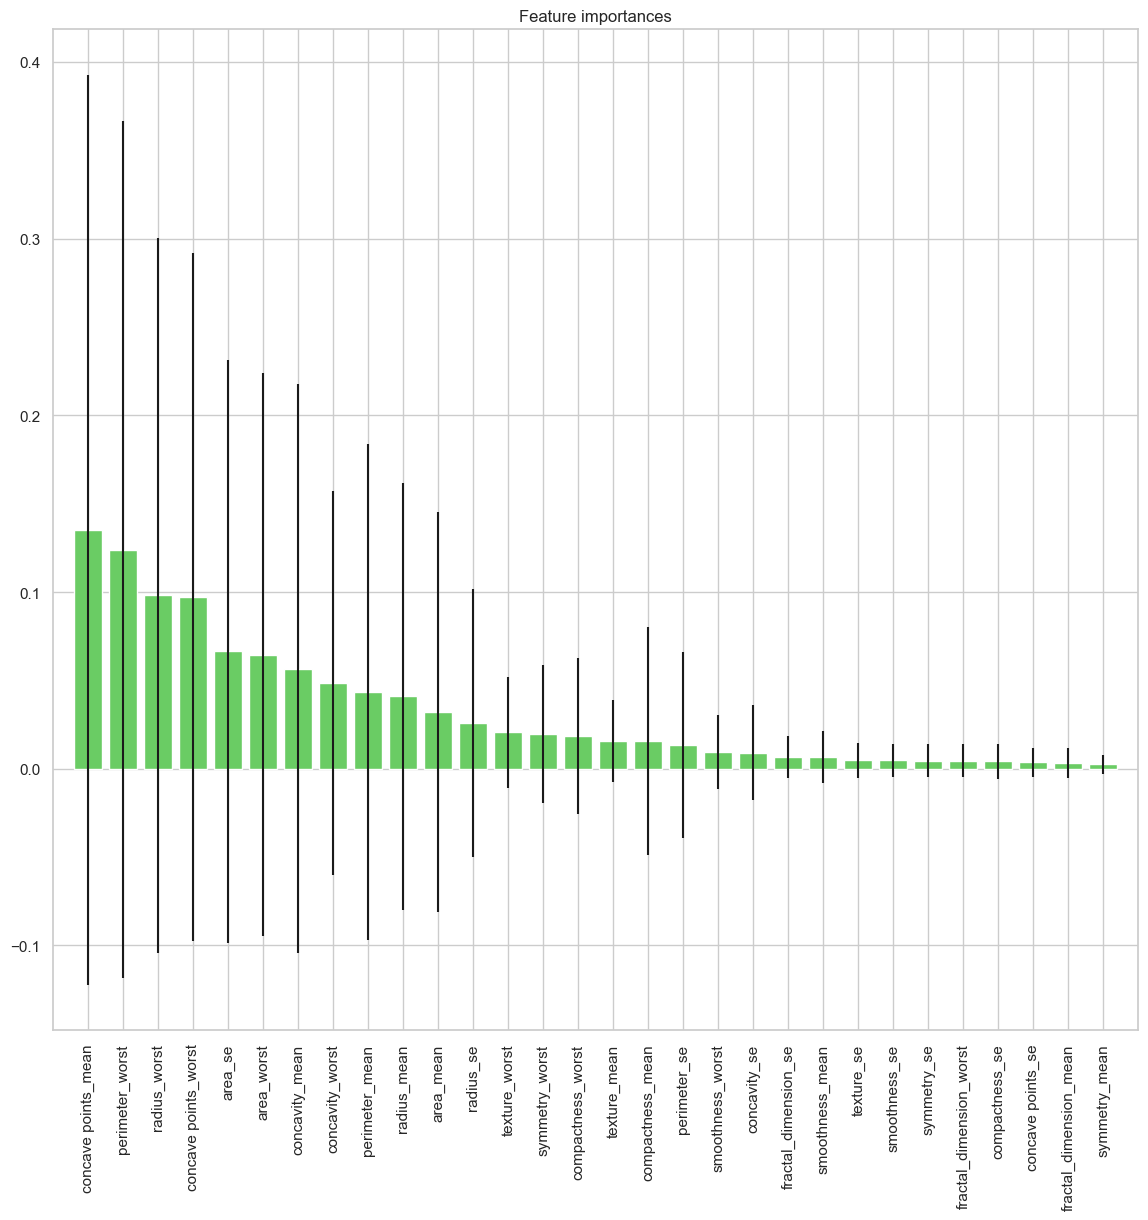

In [30]:
##5) Tree based feature selection and random forest classification¶

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Text(0, 0.5, 'explained_variance_ratio_')

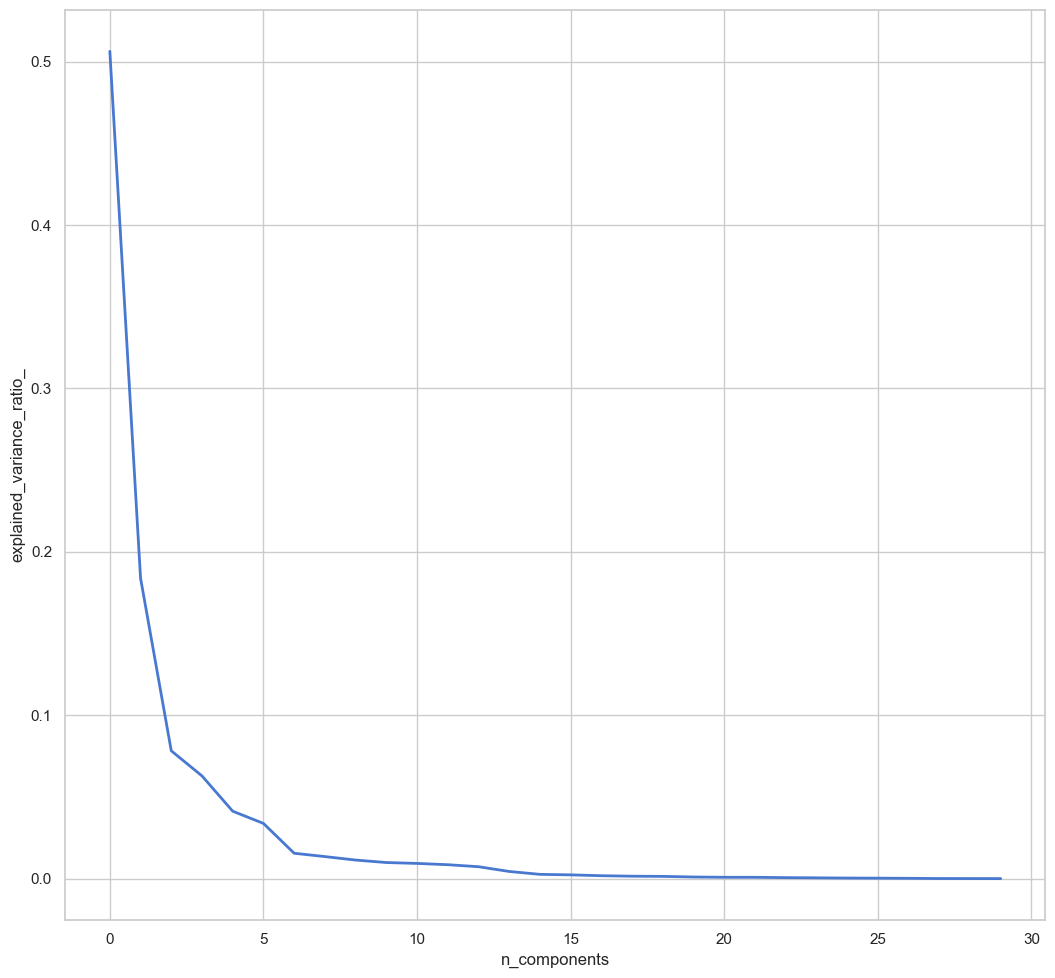

In [32]:
#PCA
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)
#normalization
x_train = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [33]:
   ## relembrando a normalização
   ##  x_train = (x_train-x_train.mean())/(x_train.max()-x_train.min())
   ## x_test = (x_test-x_test.mean())/(x_test.max()-x_test.min())

knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='rbf', C=1.0)
mlp= MLPClassifier()
reg= LogisticRegression(multi_class='ovr')
rdmfor= RandomForestClassifier(random_state=42)
gradbo= GradientBoostingClassifier()

knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
mlp.fit(x_train,y_train)
reg.fit(x_train,y_train)
rdmfor.fit(x_train,y_train)
gradbo.fit(x_train,y_train)

print(x_train.shape)
print(x_test.shape)




print("KNeighborsClassifier - Acurácia :%.5f" % accuracy_score(y_test, knn.predict(x_test)))
print("SVC - Acurácia :%.5f" % accuracy_score(y_test, svc.predict(x_test)))
print("MLP - Acurácia :%.5f" % accuracy_score(y_test, mlp.predict(x_test)))
print("Regressão Logistica - Acurácia :%.5f" % accuracy_score(y_test, reg.predict(x_test)))
print("Random Forest - Acurácia :%.5f" % accuracy_score(y_test, rdmfor.predict(x_test)))
print("Gradient Boost - Acurácia :%.5f" % accuracy_score(y_test, gradbo.predict(x_test)))



(398, 30)
(171, 30)
KNeighborsClassifier - Acurácia :0.96491
SVC - Acurácia :0.98246
MLP - Acurácia :0.98246
Regressão Logistica - Acurácia :0.98246
Random Forest - Acurácia :0.97076
Gradient Boost - Acurácia :0.97076


In [34]:
x4_train=x_train[x_train.columns[rfecv.support_]]
x4_test=x_test[x_train.columns[rfecv.support_]]


knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='rbf', C=1.0)
mlp= MLPClassifier()
reg= LogisticRegression(multi_class='ovr')
rdmfor= RandomForestClassifier(random_state=42)
gradbo= GradientBoostingClassifier()

knn.fit(x4_train,y_train)
svc.fit(x4_train,y_train)
mlp.fit(x4_train,y_train)
reg.fit(x4_train,y_train)
rdmfor.fit(x4_train,y_train)
gradbo.fit(x4_train,y_train)

print(x_train.shape)
print(x_test.shape)




print("KNeighborsClassifier - Acurácia :%.5f" % accuracy_score(y_test, knn.predict(x4_test)))
print("SVC - Acurácia :%.5f" % accuracy_score(y_test, svc.predict(x4_test)))
print("MLP - Acurácia :%.5f" % accuracy_score(y_test, mlp.predict(x4_test)))
print("Regressão Logistica - Acurácia :%.5f" % accuracy_score(y_test, reg.predict(x4_test)))
print("Random Forest - Acurácia :%.5f" % accuracy_score(y_test, rdmfor.predict(x4_test)))
print("Gradient Boost - Acurácia :%.5f" % accuracy_score(y_test, gradbo.predict(x4_test)))

(398, 30)
(171, 30)
KNeighborsClassifier - Acurácia :0.97661
SVC - Acurácia :0.98246
MLP - Acurácia :0.97661
Regressão Logistica - Acurácia :0.98246
Random Forest - Acurácia :0.97076
Gradient Boost - Acurácia :0.96491


Conclusão: Os modelos desempenham melhor sem a extração de features, alcançando:
KNeighborsClassifier - Acurácia :0.96491
SVC - Acurácia :0.98246
MLP - Acurácia :0.98246
Regressão Logistica - Acurácia :0.98246
Random Forest - Acurácia :0.97076
Gradient Boost - Acurácia :0.97076

In [ ]:
## 